# Chaos Theory Exercise

*(Scaricate la cartella e lanciate jupyter notebook dal vostro pc per vedere le immagini. Ho aggiunto un notebook interattivo per avere piu' chiaro il problema)*


Un sistema dinamico caotico è altamente sensibile alle condizioni iniziali; piccole perturbazioni in un dato momento producono traiettorie completamente diverse. Le traiettorie di un sistema caotico tendono ad avere comportamenti complessi e imprevedibili.

Molti fenomeni del mondo reale sono caotici, in particolare quelli che coinvolgono interazioni non lineari tra molti agenti (sistemi complessi). Esempi possono essere trovati in meteorologia, economia, biologia e altre discipline.

In questa ricetta simuleremo un famoso sistema caotico: la mappa logistica. Questo è un esempio archetipico di come il caos possa derivare da un'equazione non lineare molto semplice. La mappa logistica modella l'evoluzione di una popolazione, tenendo conto sia della riproduzione che della mortalità dipendente dalla densità (fame).

Disegneremo il diagramma di biforcazione del sistema, che mostra i possibili comportamenti a lungo termine (equilibri, punti fissi, orbite periodiche e traiettorie caotiche) in funzione del parametro del sistema



Come faremo...

1.  Importiamo NumPy e matplotlib:

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2.   Definiamo la mappa logistica come:

  $fr(x)=rx(1−x)$

- Implementatela qui sotto:

In [36]:
def logistic(r, x):
    return (r * x * (1-x))

#0.25 points

 3.   Qui abbiamo una rappresentazione grafica (potete usare i comandi come riferimento per i prossimi plot):

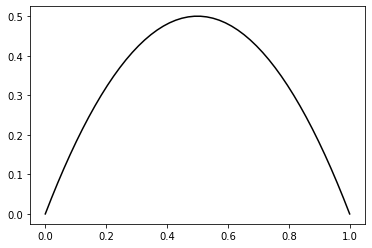

In [37]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

4. Il nostro sistema dinamico discreto è definito dall' applicazione ricorsiva della funzione logistica:
        
       
$$x_r^{n+1}= fr(x_n,r) = rx_n \cdot (1 − x_n)$$
 
- Simulate alcune iterazioni di questo sistema con due diversi valori di r:

Se volete avere un'idea piu' chiara del sistema in questione, lanciate il notebook LogisticInteractive che trovate nella cartella. Qui potrete tracciare le traiettorie del sistema facendo variare punto iniziale e tasso di crescita. Potete anche vedere se il sistema raggiunge un equilibrio. Notate qualcosa di strano quando $r$ aumenta?

- Cominciamo plottando le traiettorie del sistema: 

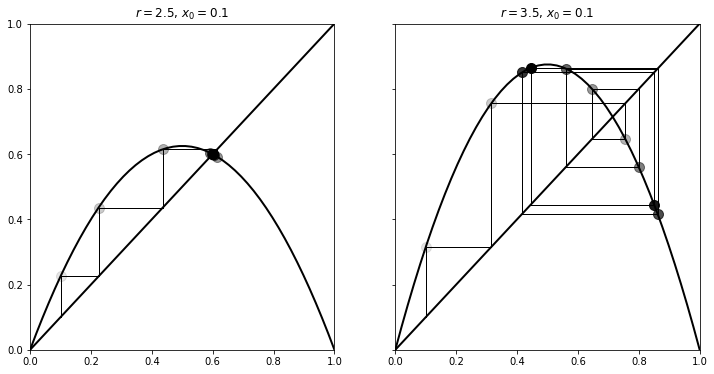

In [38]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2) #plot bisettrice

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        # INSERT MISSING

        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

#0.25 points

5.  Ora, simuliamo questo sistema per 10000 valori di r linearmente spaziati tra 2,5 e 4 e vettorializziamo la simulazione con NumPy considerando un vettore di sistemi indipendenti (un sistema dinamico per valore di parametro):

In [39]:
import numpy as np
r = np.linspace(2.5, 4.0, 10000)
len(r)

10000

6.  Usate 1000 iterazioni della mappa logistica e plottate gli ultimi 100 valori della sequenza per ottenere il grafico della biforcazione

In [40]:
iterations = 1000
last = 100

7.  Inizializziamo il sistema con x0=0.00001

In [41]:
n= 10000
x = 1e-5 * np.ones(n)

- Simulate il sistema e plottate le ultime 100 iterazioni al variare del parametro r


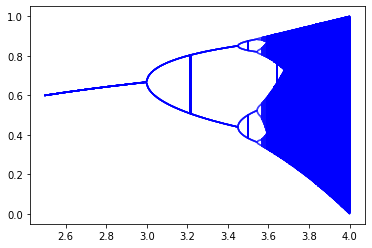

In [42]:
fig, ax = plt.subplots(1, 1)

for i in range(iterations):
    x = logistic(r, x) 
    if i >= (iterations - last):
        ax.plot(r, x, 'b', alpha = 0.1)


# Cosa sta succedendo?

Il nostro sistema per valori del parametro $r$ minore di due il sistema tende asintoticamente ad un equilibrio, se è maggiore di due il sistema tenderà ad esso con un andamento di tipo oscillatorio. 

Consideriamo  l’evoluzione  del  sistema  per  valori  del  parametro $r$ maggiori  di  tre.  Aumentando  il  valore  del  parametro $r$,  accade  che  il  punto  di equilibrio  diviene  un  punto  instabile,  la  traiettoria  del  nostro  modello  dopo  un  breve transitorio inizia ad oscillare indefinitivamente tra due valori.

Se  aumentiamo  ulteriormente  il  valore  del  parametro $r$,  la  traiettoria  del sistema  ha  un  andamento  sempre  di  tipo  oscillante, ma  con  un  periodo  che  va progressivamente  raddoppiando.  Passiamo  da  due  a  quattro  e  successivamente  a otto e così via di seguito.

Non appena il valore del parametro $r$ supera il valore di 3.56 la traiettoria del  sistema  dinamico  non  presenta  più  alcuna  regolarità,  si  parla  di  traiettorie caotiche

## Parte 2: il Frattale di Mandelbrot

![SegmentLocal](Mandelbrot.png "segment")

L'insieme di mandelbrot è definito dall'insieme di numeri complessi $c$ per i quali i numeri complessi della sequenza $z_n$ rimangono limitati in valore assoluto. La sequenza zn

è definito da:

$$z_0 = 0$$

$$z_n + 1 = z^2_n + c$$

Come promemoria, il modulo di un numero complesso è la sua distanza da 0. In Python, questo è ottenuto usando $abs (z)$ dove z è un numero complesso. Assumiamo che la sequenza $z_n$ non è limitata se il modulo di uno dei suoi termini è maggiore di 2.

La rappresentazione visiva dell'insieme di Mandelbrot può essere creata determinando, per ogni punto $c$
di una parte del piano complesso, se la rispettiva successione $z_n$ e' limitata. Il numero di iterazioni per raggiungere un modulo maggiore di 2 può essere utilizzato per determinare il colore da utilizzare.


- Definite la funzione $mandelbrot$ che restituirà il numero di iterazioni necessarie per raggiungere un modulo maggiore di 2. Se il numero di iterazioni è maggiore di MAX_ITER, fermati e restituisci MAX_ITER.

In [43]:
MAX_ITER = 50

def mandelbrot(c):
    z = 0
    n_iter = 0
    global MAX_ITER
    while abs(z) <= 2 and n_iter < MAX_ITER:
        z = z**2 + c
        n_iter += 1 
        
    return n_iter
        

- Plottate il frattale di mandelbrot

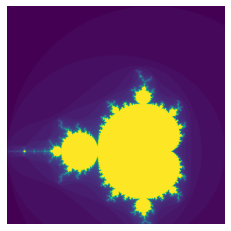

In [44]:
import cmath 
a = np.linspace(-2,1,500)
b = np.linspace(-2,1,500)
n_iters = np.full ((len(a), len(b)),0 )
for i in range(len(a)):
    for j in range(len(b)):
        c = complex(a[i],b[j])
        n_iters [j][i] = mandelbrot(c) 

plt.imshow(n_iters)
plt.axis("off")
plt.show()


# E ora?

Con un semplice cambiamento di variabili, la nostra mappa logistica $x_{n + 1} = r\cdot x_n (1 - x_n)$, può essere ricodificata nella forma $x_n + 1 = x_n^2 + c$. Notate la somiglianza con la formula di iterazione dell'insieme di Mandelbrot.
Lasciando che c vada da c = 1/4 a c = -2, genera la sequenza di numeri $x_0= 0, x_1 = x_0^2 + c, x_2 = x_1^2 + c$, .... 

Traccia c lungo l'asse orizzontale e, sulla linea verticale sopra ogni valore c, traccia da $x_{100}$ a $x_{200}$

Per $-3/4 <c <1/4$, i valori $x_i$ convergono a un punto fisso, il cui valore dipende da c, decrescente al diminuire di c.

Per $-5/4 <c <-3/4$, i valori $x_i$ convergono a 2 cicli. E così via.

 



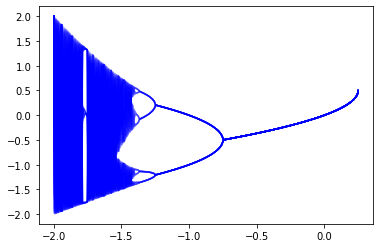

In [46]:
# Plottate le ultime 100 iterazioni della nuova sequenza per -2<c<1/4
fig, ax = plt.subplots(1, 1)
c = np.linspace(-2, 0.25 ,500)
x = 0 
for i in range(len(c)):
    x = x**2 + c
    if i >= (len(c) - last):
        ax.plot(c, x, 'b', alpha = 0.1)
    
# 0.5 points

Tracciando tutti questi eventuali comportamenti insieme per $-2 <c <1/4$  si ottiene il diagramma di biforcazione per la mappa logistica ricodificata. Questa è la parte superiore della figura a destra.
Si noti dall'inserto che il diagramma di biforcazione logistica ha caratteristiche frattali: è pieno di piccole copie di se stesso.

![SegmentLocal](MandelBif.gif "segment")

Dalla struttura di ramificazione del diagramma di biforcazione logistica possiamo leggere il numero di cicli delle caratteristiche corrispondenti dell'insieme di Mandelbrot.
Quindi tutte le dinamiche interessanti della mappa logistica sono contenute nella sezione centrale dell'insieme di Mandelbrot (la parte lungo l'asse reale)

Se l'argomento vi ha incuriosito, vi consiglio il video:
    
https://www.youtube.com/watch?v=ovJcsL7vyrk